In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Toy models

First generate a bubble field with ipython. Import the module

In [3]:
from Random_bubbles import *

Creates a periodic field with dimension NDIM=2, 512x512 (DIM) pixels, with bubbles of radius 20 pixels, allowed to overlap, to reach a given filling fraction of 0.05.

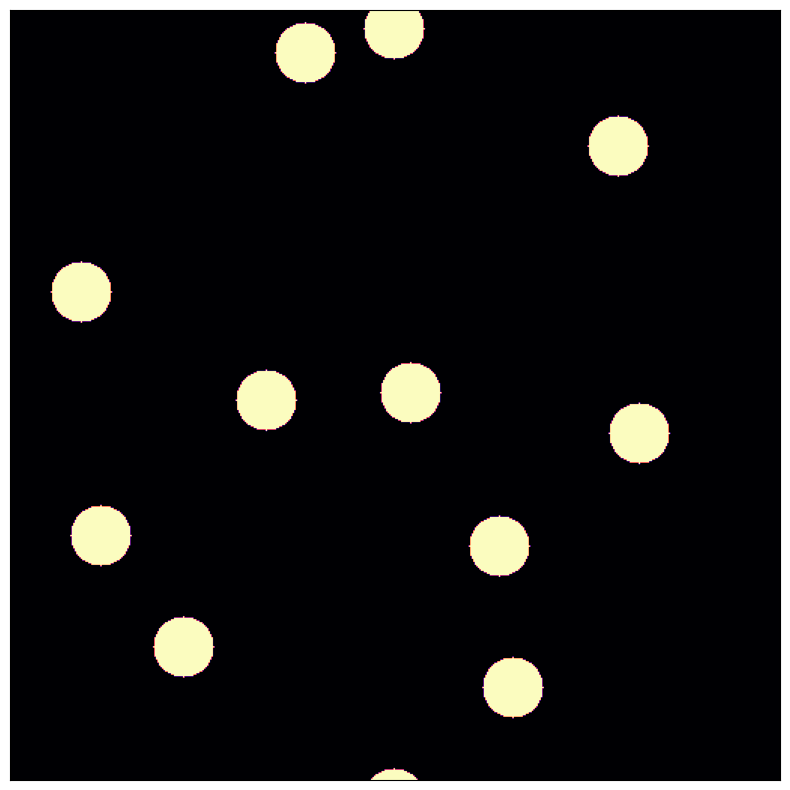

In [4]:
cube = RandomBubbles(
    DIM=512,
    fillingfraction=0.05,
    params=[20, 0],
    NDIM=2,
    nooverlap=False,
    periodic=True,
    save=True) 

The output object has different attributes:

In [5]:
print(f'The box contains {cube.nb} bubbles.')

The box contains 11 bubbles.


`cube.bubble_centres` is the list of coordinates of bubble centres.

`cube.box` is the simulation box itself.

The filling fraction of the simulated box might be different from the target one (because of the integer number of bubbles):

In [6]:
np.mean(cube.box), cube.fillingfraction

(0.052745819091796875, 0.05)

The resulting box is saved as a pickle file. Here is how to read it:

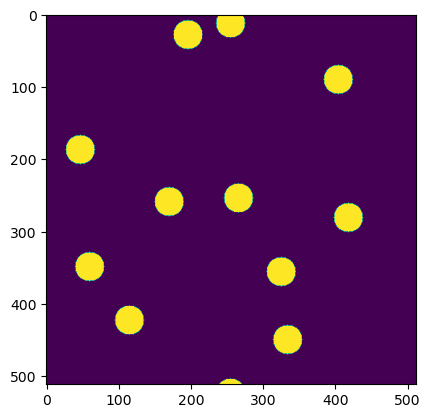

In [7]:
import glob, pickle
filename = glob.glob('*pkl')[0]
f = open(filename,'rb')  
cube = pickle.load(f) 
f.close()

xion = cube.box 
plt.figure()
plt.imshow(xion)

You can also generate a field with bubbles that are not step functions, but rather have a Gaussian profile:

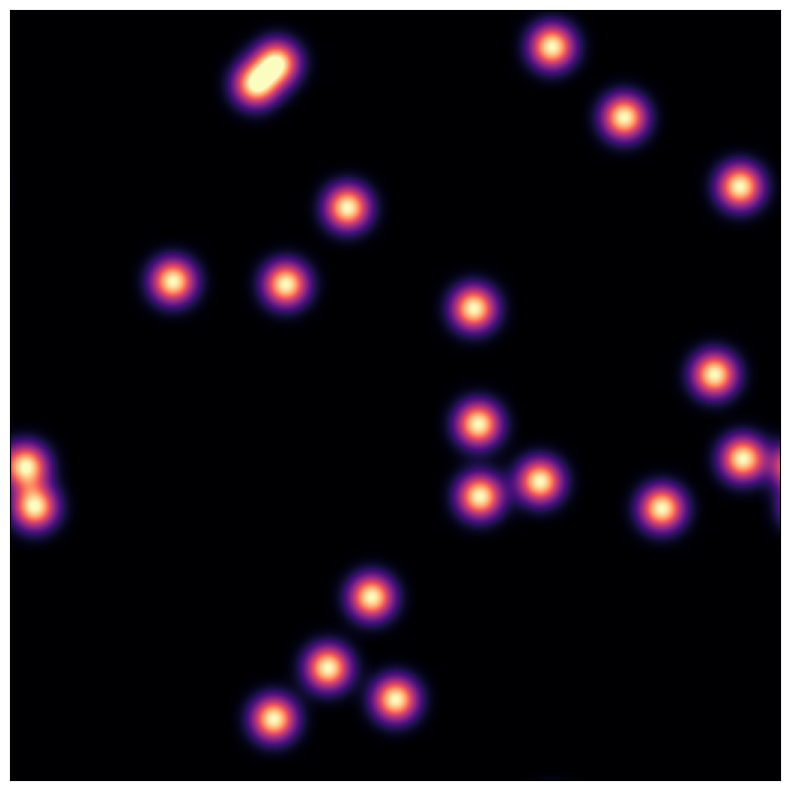

In [8]:
gaussian_cube = RandomBubbles(
    DIM=512,
    fillingfraction=0.05,
    params=[10, 0],
    NDIM=2,
    gaussian_profile=True,
    ) 

With the `params` and `radius_distribution` keys, you can control the sizes of your ionised bubbles. The distribution of bubble radii can be 
- A Dirac delta function (all bubbles have the same radius R, as above): `radius_distribution=0` and `params=[R, 0.]`
- A normal distribution (`radius_distribution=1`) with mean `params[0]` and standard deviation `params[1]`
- A lognormal distribubtion (`radius_distribution=2`) with mean `params[0]` and standard deviation `params[1]`.
These different options are illustrated below:

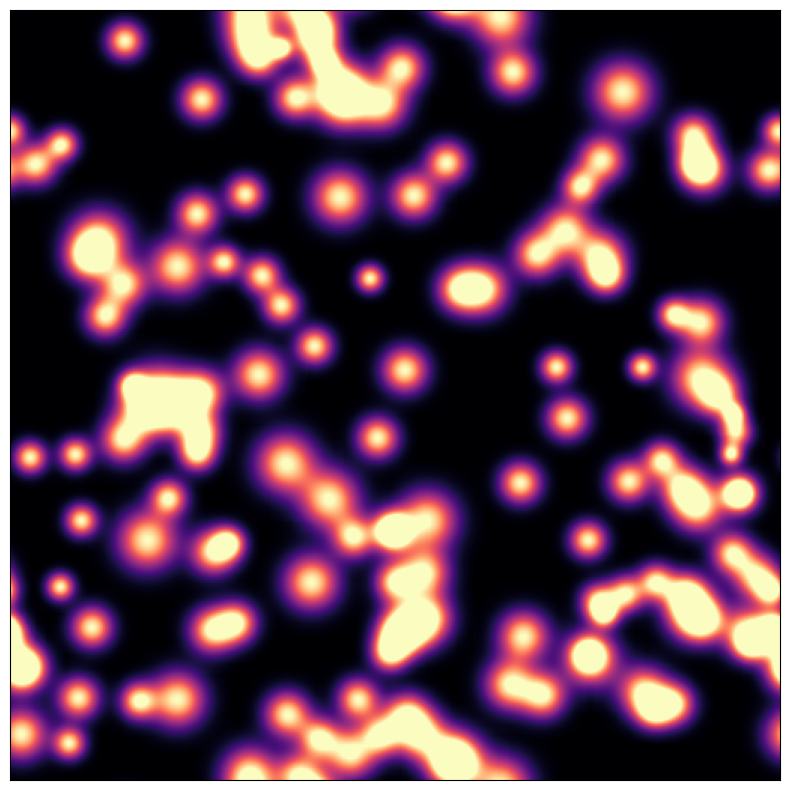

In [9]:
# normal distribution
normal_distri_cube = RandomBubbles(
    DIM=512,
    fillingfraction=0.30,
    params=[10, 2],
    radius_distribution=1,  # normal distribution
    NDIM=2,
    gaussian_profile=True,
    ) 

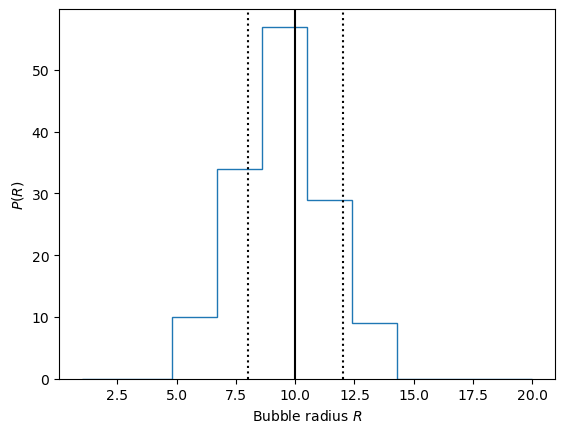

In [10]:
_ = plt.hist(normal_distri_cube.bubble_radii, range=(1, 20), histtype='step')
plt.xlabel(r'Bubble radius $R$')
plt.ylabel(r'$P(R)$')
plt.axvline(normal_distri_cube.mean_radius, color='k', ls='-')
plt.axvline(normal_distri_cube.mean_radius+normal_distri_cube.sigma_radius, color='k', ls=':')
plt.axvline(normal_distri_cube.mean_radius-normal_distri_cube.sigma_radius, color='k', ls=':')

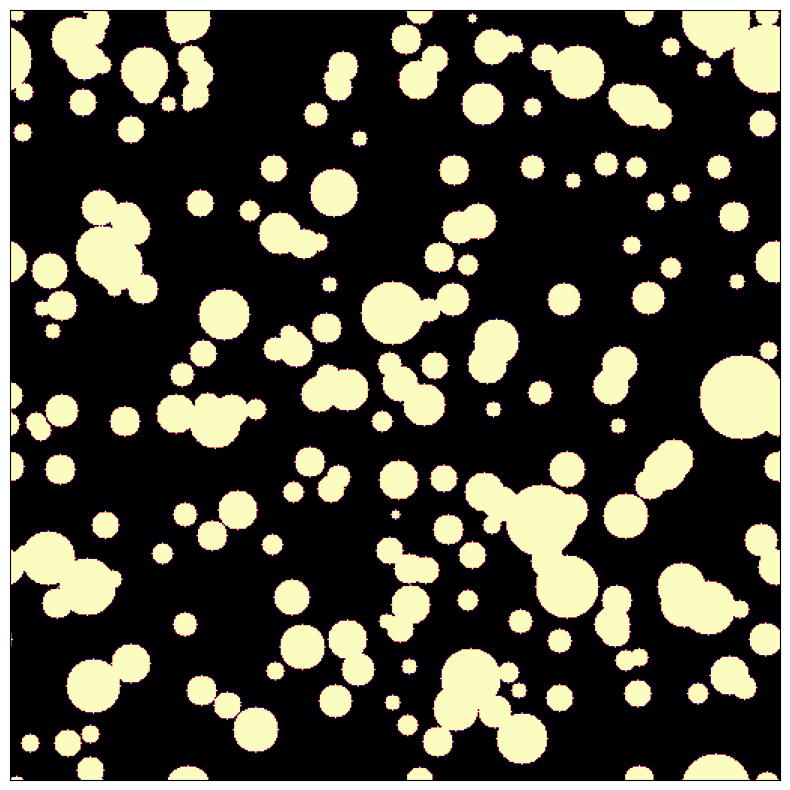

In [11]:
# lognormal distribution
lognormal_distri_cube = RandomBubbles(
    DIM=512,
    fillingfraction=0.30,
    params=[10, 4],
    radius_distribution=2, 
    NDIM=2,
    gaussian_profile=False,
    ) 

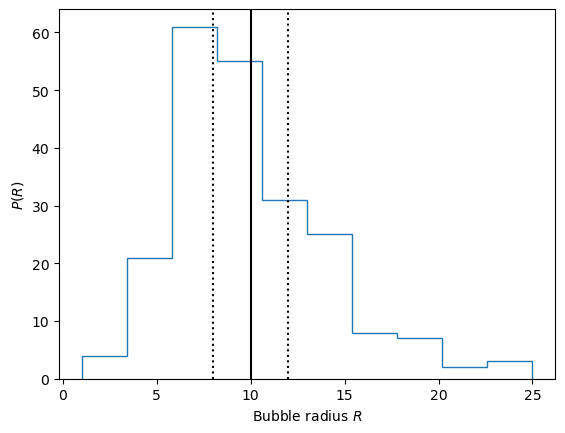

In [12]:
_ = plt.hist(lognormal_distri_cube.bubble_radii, histtype='step', range=(1, 25))
plt.xlabel(r'Bubble radius $R$')
plt.ylabel(r'$P(R)$')
plt.axvline(lognormal_distri_cube.mean_radius, color='k', ls='-')
plt.axvline(lognormal_distri_cube.mean_radius+normal_distri_cube.sigma_radius, color='k', ls=':')
plt.axvline(lognormal_distri_cube.mean_radius-normal_distri_cube.sigma_radius, color='k', ls=':')